In [1]:
import os
import cv2 # pip install opencv-python==4.8.0.74, with pip install numpy==1.23.0
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Evan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [52]:
# import sys
# !{sys.executable} -m pip uninstall numpy --yes

# !pip uninstall numpy --yes
# !pip install numpy==1.23.0 

# print(np.__version__)

## 1. Preprocessing

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
# split into training and testing data

# x data = image, # y data = the digit
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [4]:
# normalize (make every value between 0-1 rather than 0-255)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## 2. Neural Network

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # add a flattened layer (turned 28x28 data to list of 784) to NN 

# connect each neuron from last layer to this dense layer and vice versa, activation function is 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(128, activation='relu')) 

model.add(tf.keras.layers.Dense(10, activation='softmax')) # softmax activiation will result in a sum of 1 between all neurons in last layer

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# fit/train the model with the training data
model.fit(x_train, y_train, epochs=10)
model.save('handwritten.model')

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0322 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0246 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0169 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0123 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.010

INFO:tensorflow:Assets written to: handwritten.model\assets


In [9]:
model = tf.keras.models.load_model('handwritten.model')#

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print("loss = ", loss) 
print("accuracy = ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1176 - accuracy: 0.9756
loss =  0.11755996942520142
accuracy =  0.975600004196167


## 3. Test the model

1/1 [==============================] - 1s 876ms/step
This digit is probably a 0


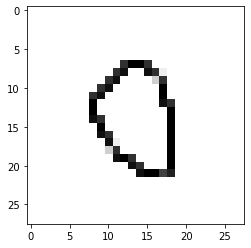

1/1 [==============================] - 0s 61ms/step
This digit is probably a 1


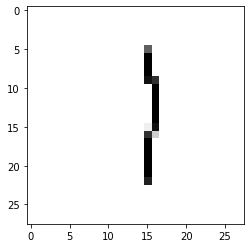

1/1 [==============================] - 0s 58ms/step
This digit is probably a 8


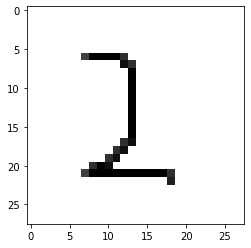

1/1 [==============================] - 0s 24ms/step
This digit is probably a 7


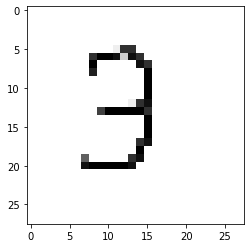

1/1 [==============================] - 0s 63ms/step
This digit is probably a 7


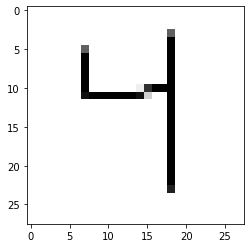

1/1 [==============================] - 0s 22ms/step
This digit is probably a 6


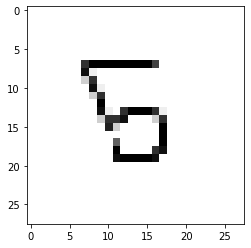

1/1 [==============================] - 0s 26ms/step
This digit is probably a 6


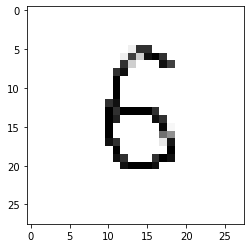

1/1 [==============================] - 0s 26ms/step
This digit is probably a 7


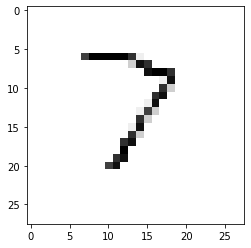

1/1 [==============================] - 0s 24ms/step
This digit is probably a 8


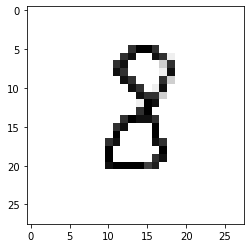

1/1 [==============================] - 0s 29ms/step
This digit is probably a 9


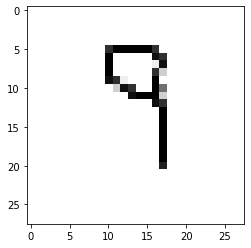

In [12]:
image_number = 0
while os.path.isfile(f"digits/{image_number}.png"):
    try:
        img = cv2.imread(f"digits/{image_number}.png")[:,:,0]
        img = np.invert(np.array([img])) # invert colors
        img = img / 255.0  # normalize pixel values to [0, 1]
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number += 1